This notebook provides for a visual check of ms1 and ms2 peak centroids

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
from scipy.signal import correlate

In [3]:
feature_id = 11359
ms1_peak_id = 2

In [4]:
database_name = '/home/ubuntu/HeLa_20KInt/HeLa_20KInt-features-{}-{}.sqlite'.format(feature_id, feature_id)

In [5]:
source_conn = sqlite3.connect(database_name)
max_peak_id_df = pd.read_sql_query("select max(peak_id) from ms1_feature_region_peaks where feature_id={}".format(feature_id), source_conn)
source_conn.close()
max_peak_id_df

,max(peak_id)
0,4


In [6]:
source_conn = sqlite3.connect(database_name)
ms1_peaks_df = pd.read_sql_query("select centroid_scan from ms1_feature_region_peaks where feature_id={} and peak_id={}".format(feature_id,ms1_peak_id), source_conn)
source_conn.close()

In [7]:
peak_centroid = ms1_peaks_df.loc[0].centroid_scan
peak_centroid

529.7912936620775

In [8]:
source_conn = sqlite3.connect(database_name)
ms1_peak_points_df = pd.read_sql_query("select * from summed_ms1_regions where feature_id={} and peak_id={}".format(feature_id,ms1_peak_id), source_conn)
source_conn.close()

In [9]:
ms1_peak_points_df.head()

,feature_id,point_id,mz,retention_time_secs,scan,intensity,number_frames,peak_id,feature_point
0,11359,2,703.330825,2333.888755,519,478,1,2,11359|2
1,11359,4,703.352972,2333.425213,520,411,1,2,11359|4
2,11359,6,703.359339,2334.277419,521,719,1,2,11359|6
3,11359,8,703.352522,2333.964965,522,757,1,2,11359|8
4,11359,10,703.361922,2333.848092,523,946,1,2,11359|10


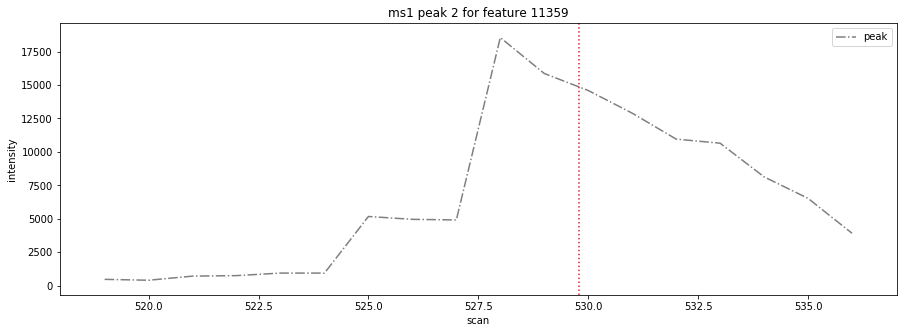

In [10]:
fig, ax1 = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1.plot(ms1_peak_points_df.scan, ms1_peak_points_df.intensity, marker='', linestyle='-.', ms=5, color='tab:gray', label='peak')
plt.axvline(x=peak_centroid, linestyle=':', color='tab:red')
plt.legend(loc='best')
ax1.set_ylabel('intensity')
ax1.set_xlabel('scan')
plt.title("ms1 peak {} for feature {}".format(ms1_peak_id,feature_id))
plt.margins(0.06)
plt.show()

In [11]:
source_conn = sqlite3.connect(database_name)
max_peak_id_df = pd.read_sql_query("select max(peak_id) from ms2_peaks where feature_id={}".format(feature_id), source_conn)
source_conn.close()
max_peak_id_df

,max(peak_id)
0,112


In [15]:
ms2_peak_id = 112

In [16]:
source_conn = sqlite3.connect(database_name)
ms2_peaks_df = pd.read_sql_query("select centroid_scan from ms2_peaks where feature_id={} and peak_id={}".format(feature_id,ms2_peak_id), source_conn)
source_conn.close()

In [17]:
ms2_centroid_scan = ms2_peaks_df.loc[0].centroid_scan

In [18]:
source_conn = sqlite3.connect(database_name)
ms2_peak_points_df = pd.read_sql_query("select * from summed_ms2_regions where feature_id={} and peak_id={}".format(feature_id,ms2_peak_id), source_conn)
source_conn.close()

In [19]:
ms2_peak_points_df.head()

,feature_id,peak_id,point_id,mz,scan,intensity
0,11359,112,785,1075.535,512,9
1,11359,112,786,1075.535,515,129
2,11359,112,787,1075.535,523,19
3,11359,112,788,1075.535,525,51
4,11359,112,789,1075.535,526,11


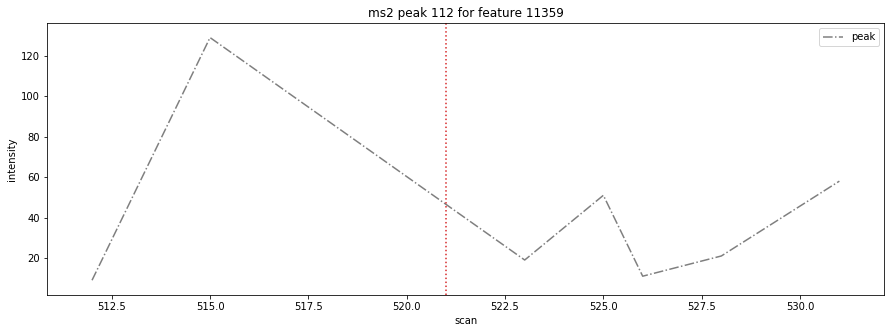

In [20]:
fig, ax1 = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1.plot(ms2_peak_points_df.scan, ms2_peak_points_df.intensity, marker='', linestyle='-.', ms=5, color='tab:gray', label='peak')
plt.axvline(x=ms2_centroid_scan, linestyle=':', color='tab:red')
plt.legend(loc='best')
ax1.set_ylabel('intensity')
ax1.set_xlabel('scan')
plt.title("ms2 peak {} for feature {}".format(ms2_peak_id,feature_id))
plt.margins(0.06)
plt.show()